In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Preprocessing

In [2]:
#create x0 where equals to 1,where w0 = b --> x0*w0 = b
x1000 = pd.DataFrame([1] * 1000)
x100 = pd.DataFrame([1] * 100)

# read 3 dataset csv file and change to dataframe using pandas
train1 = pd.DataFrame(pd.read_csv('train-100-10.csv'))
train2 = pd.DataFrame(pd.read_csv('train-100-100.csv'))
train3 = pd.DataFrame(pd.read_csv('train-1000-100.csv'))

test1 = pd.DataFrame(pd.read_csv('test-100-10.csv'))
test2 = pd.DataFrame(pd.read_csv('test-100-100.csv'))
test3 = pd.DataFrame(pd.read_csv('test-1000-100.csv'))
train1.shape,train2.shape,train3.shape,test1.shape,test2.shape,test3.shape,

((100, 11), (100, 101), (1000, 101), (1000, 11), (1000, 101), (1000, 101))

In [3]:
# add x0 into dataset 
train1 = pd.concat([x100,train1],axis = 1)
train2 = pd.concat([x100,train2],axis = 1)
train3 = pd.concat([x1000,train3],axis = 1)

test1 = pd.concat([x1000,test1],axis = 1)
test2 = pd.concat([x1000,test2],axis = 1)
test3 = pd.concat([x1000,test3],axis = 1)


In [4]:
# Creating 3 additional trianing files from trianing-1000-10 by taking the first 50, 100, and 150 instances
train50 = train3.iloc[0:50,:]
train100 = train3.iloc[0:100,:]
train150 = train3.iloc[0:150,:]
train50.to_csv('train-50(1000)-100.csv')
train100.to_csv('train-100(1000)-100.csv')
train150.to_csv('train-150(1000)-100.csv')

In [5]:
# Transfer dataset to fit L2_regularized
def Transfer_xy(dataset):      # input is a dataframe
    x = dataset.drop('y',axis =1).values
    y = dataset['y'].values.reshape(-1,1)
    return x,y

In [6]:
def L2_regularized(x,y,xtest,ytest): 
    '''
    input:x,y are np.ndarray from training data; xtest,ytest are np.ndarray from test data
    output: print the Minimum Mean Square Error of training data and testing data corresponding to lambda
    '''
    λ = np.arange(0,151)
    w_L2 = []
    MSE_train = []
    MSE_test = []
    
    for i in λ:
        w = np.dot(np.linalg.inv(x.T.dot(x)+λ[i]*np.eye(len(x[0]))),x.T).dot(y)
        
        MSEtrain = ((x.dot(w)-y)**2).mean()
        MSE_train.append(MSEtrain)
        
        MSEtest = ((xtest.dot(w)-ytest)**2).mean()
        MSE_test.append(MSEtest)
        w_L2.append(w)
        
    print('The Minimum Mean Square error is :{}'.format(min(MSE_train)))
    print("for best λ is :{}".format(MSE_train.index(min(MSE_train))))
    print('The Minimum Mean Square error is :{}'.format(min(MSE_test)))
    print("for best λ is :{}".format(MSE_test.index(min(MSE_test))))
    
    #return MSE_train, MSE_test

    #return MSE
    #print(len(MSE_train),len(MSE_test))
    
    #plt.figure(figsize = (10,6),dpi=300)   
    #plt.plot(list(λ),MSE_train,color= 'b')
    #plt.plot(list(λ),MSE_test,color='r')
    #plt.xlabel('Lambda')
    #plt.ylabel('Mean Squared Error')
    #plt.show()

# Minimum MSE

For each dataset, print the lambda that gives the minimum MSE.

In [7]:
xtrain1,ytrain1 = Transfer_xy(train1)
xtest1,ytest1 = Transfer_xy(test1)
L2_regularized(xtrain1,ytrain1,xtest1,ytest1)

The Minimum Mean Square error is :5.450043520977647
for best λ is :0
The Minimum Mean Square error is :6.258031077165362
for best λ is :9


In [8]:
xtrain2,ytrain2 = Transfer_xy(train2)
xtest2,ytest2 = Transfer_xy(test2)
L2_regularized(xtrain2,ytrain2,xtest2,ytest2)

The Minimum Mean Square error is :0.46930018051642974
for best λ is :1
The Minimum Mean Square error is :6.965437997045874
for best λ is :24


In [9]:
xtrain3,ytrain3 = Transfer_xy(train3)
xtest3,ytest3 = Transfer_xy(test3)
L2_regularized(xtrain3,ytrain3,xtest3,ytest3)

The Minimum Mean Square error is :5.210034703130466
for best λ is :0
The Minimum Mean Square error is :6.389138883301879
for best λ is :45


# Graph

Plot both the training set MSE and the test set MSE as a function lambda(x-axis) in one graph

In [10]:
def MSE_L2_regularized(x,y,xtest,ytest):
    '''
    input:x,y are np.ndarray from training data; xtest,ytest are np.ndarray from test data
    output: return the list of the Mean Square Error of training data and testing data corresponding to lambda
    '''
    λ = np.arange(0,151)
    w_L2 = []
    MSE_train = []
    MSE_test = []
    
    for i in λ:
        w = np.dot(np.linalg.inv(x.T.dot(x)+λ[i]*np.eye(len(x[0]))),x.T).dot(y)
        
        MSEtrain = ((x.dot(w)-y)**2).mean()
        MSE_train.append(MSEtrain)
        
        MSEtest = ((xtest.dot(w)-ytest)**2).mean()
        MSE_test.append(MSEtest)
        w_L2.append(w)
        
    #print('The Minimum Mean Square error is :{}'.format(min(MSE_train)))
    #print("for best λ is :{}".format(MSE_train.index(min(MSE_train))))
    #print('The Minimum Mean Square error is :{}'.format(min(MSE_test)))
    #print("for best λ is :{}".format(MSE_test.index(min(MSE_test))))
    
    return MSE_train, MSE_test

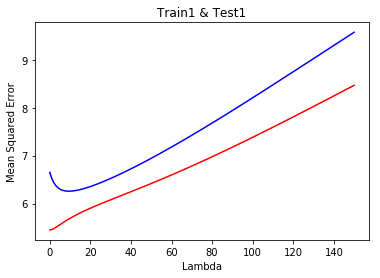

In [11]:
#train/test-100-10.csv'

xtest1,ytest1 = Transfer_xy(test1)
xtrain1,ytrain1 = Transfer_xy(train1)

MSE_train1, MSE_test1 = MSE_L2_regularized(xtrain1,ytrain1,xtest1,ytest1)
  
λ = np.arange(0,151)
#plt.figure(figsize = (10,6),dpi=300)   
plt.plot(list(λ),MSE_train1,color= 'r')
plt.plot(list(λ),MSE_test1,color='b')
plt.xlabel('Lambda')
plt.ylabel('Mean Squared Error')
plt.title("Train1 & Test1")
plt.show()


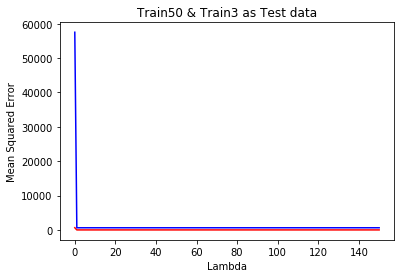

In [12]:
#train-100-100.csv
xtest2,ytest2 = Transfer_xy(train3)
xtrain2,ytrain2 = Transfer_xy(train50)
MSE_train2, MSE_test2 = MSE_L2_regularized(xtrain2,xtrain2,xtest2,ytest2)

λ = np.arange(0,151)
#plt.figure(figsize = (10,6),dpi=300)   
plt.plot(list(λ),MSE_train2,color= 'r')
plt.plot(list(λ),MSE_test2,color='b')
plt.xlabel('Lambda')
plt.ylabel('Mean Squared Error')
plt.title("Train50 & Train3 as Test data")
plt.show()

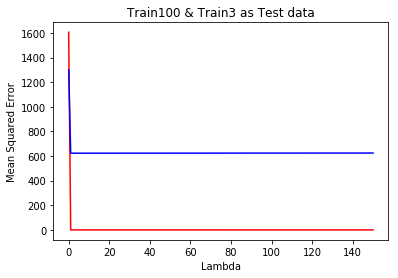

In [13]:
#train-1000-100.csv
xtrain3,ytrain3 = Transfer_xy(train100)
xtest3,ytest3 = Transfer_xy(train3)
MSE_train3, MSE_test3 = MSE_L2_regularized(xtrain3,xtrain3,xtest3,ytest3)

λ = np.arange(0,151)
#plt.figure(figsize = (10,6),dpi=300)   
plt.plot(list(λ),MSE_train3,color= 'r')
plt.plot(list(λ),MSE_test3,color='b')
plt.xlabel('Lambda')
plt.ylabel('Mean Squared Error')
plt.title("Train100 & Train3 as Test data")
plt.show()